# Questions:


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('trainMiniProj.csv')

In [40]:
font1 = {'family': 'serif', 'color': 'red', 'size': 20}
font2 = {'family': 'serif', 'color': 'red', 'size': 15}

<AxesSubplot:>

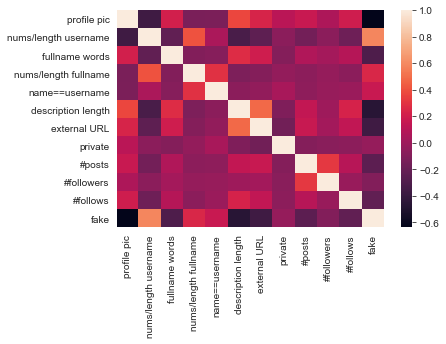

In [67]:
heatMap = train.corr()
sns.heatmap(heatMap)

## 1. Determine the maximum no. of followers possessed by a user belonging to the group of users with no profile picture.

<AxesSubplot:xlabel='profile pic', ylabel='count'>

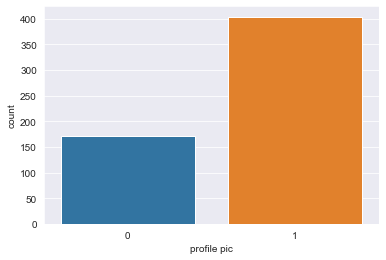

In [5]:
sns.set_style('darkgrid')
sns.countplot(x="profile pic", data=train)

#### From above data we observe the number of people with "No profile pic" is comparatively lower than the ones with "Profile Pic"

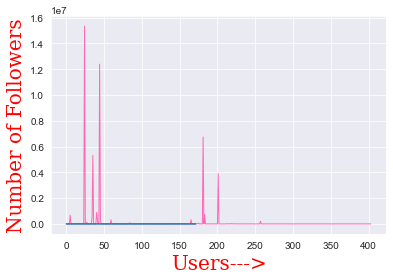

In [53]:
a = []
b = []
x = train['profile pic']
for i in range(len(x)):
    if (x[i] == 1):
        a.append(train['#followers'][i])
    elif (x[i] == 0):
        b.append(train['#followers'][i])
        
        
p1 = np.array(a)
p0 = np.array(b)


plt.plot(p1, color = 'hotpink', linewidth = 1)  
plt.plot(p0)  
plt.ylabel('Number of Followers', fontdict = font1)
plt.xlabel('Users--->', fontdict = font1)
plt.show()

In [6]:
b = train[['profile pic','#followers']]
c = len(b['profile pic'])
m = 0
for i in range(c):
    if (train['profile pic'][i] == 0):
        if (train['#followers'][i] > m):
            m = train['#followers'][i]
            
print("\nThe Maximum number of followers possessed by a User with No Profile pic is:", m, "\n")


The Maximum number of followers possessed by a User with No Profile pic is: 3033 



## 2. Dead accounts are characterized by a lack of substantial activity on the platform, primarily concerning the accounts with no profile picture, empty bio and 0 posts. Determine the number of dead accounts, if they exist.

C:\Users\Nishi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='description length', ylabel='Density'>

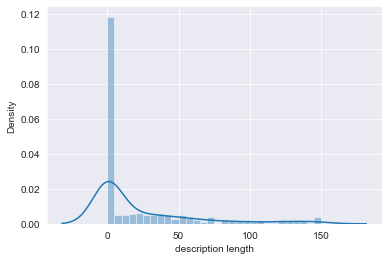

In [7]:
sns.distplot(train['description length'], bins = 30)

### Here we observe from the above graph, that density of bios with 0 description length is quite high

C:\Users\Nishi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='#posts', ylabel='Density'>

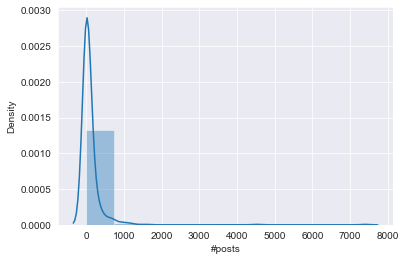

In [8]:
sns.distplot( train['#posts'], bins = 10)

### Here we see, the density of profiles with 0 posts is higher as well

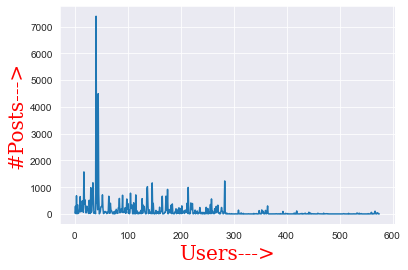

In [74]:
y = train['#posts']
a = []
    
for i in y:
    a.append(i)

m = np.array(a)

plt.plot(m)
plt.xlabel('Users--->', fontdict = font1)
plt.ylabel('#Posts--->', fontdict = font1)
plt.show()

In [9]:
b = train[['profile pic', 'description length', '#posts']]
n = 0
for i in range(len(b)):
    if ((b['profile pic'][i] == 0) and (b['description length'][i] == 0) and (b['#posts'][i] == 0)):
        n += 1
if (n == 0):
    print("There are no dead accounts in the database.")
else:
    print("Number of dead accounts: ", n)
    

Number of dead accounts:  123


## 3. Find out how expressive a person is on Instagram based on the length of their bio. 
### (Hint: An expressive person can be defined as the user whose description_length exceeds the average.)

In [64]:
b = train['description length']
mylabels = ['Expressive', 'Not so Expressive']
a = [0, 0]
avg = 0
lst = []
for i in b:
    avg += i
avg = avg / len(b)
avg = "%.2f"%avg
avg = float(avg)
for i in range(len(b)):
    if (b[i] > avg):
        a[0] += 1
        per = ((b[i] - avg) / b[i]) * 100
        per = float("%.2f"%per)
        lst.append(per)
        
    else:
        a[1] += 1
        if (b[i] != 0):
            per = ((avg - b[i]) / b[i]) * 100
            per = float("%.2f"%per)
            lst.append(per)
        else:
            per = 0
            lst.append(per)

print("The average description length is:", avg)

The average description length is: 22.62


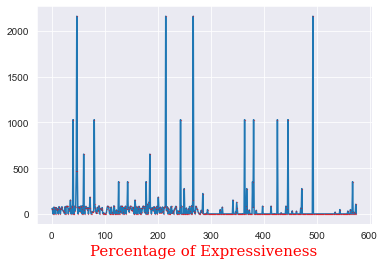

In [66]:
ypoints = np.array(lst)

plt.plot(ypoints, marker = 'o', ms = 0.2, mec = 'r')
plt.xlabel("Percentage of Expressiveness", fontdict = font2)
plt.show()


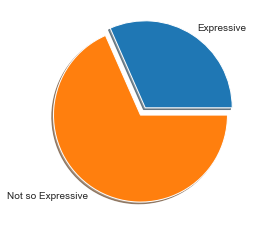

In [11]:
y = np.array(a)
myexplode = [0.1, 0]
plt.pie(y, labels = mylabels, explode = myexplode, shadow = True)
plt.show()

## 4. Determine the maximum no. of followers possessed by a user among those who have 0 posts on their respective accounts.

In [27]:

b = train[['#followers', '#posts']]
m = 0
lst = []
for i in range(len(b)):
    if (b['#posts'][i] == 0):
        lst.append(b['#followers'][i])
        if (b['#followers'][i] > m):
            m = b['#followers'][i]
        
print("\nThe Maximum Number of followers possessed by a User with 0 posts is:", m, "\n")


The Maximum Number of followers possessed by a User with 0 posts is: 3033 



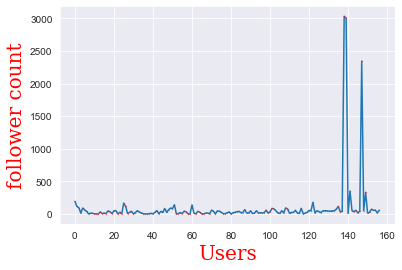

In [61]:
ypoints = np.array(lst)

plt.plot(ypoints, marker = 'o', ms = 0.2, mec = 'r')
plt.ylabel('follower count', fontdict= font1)
plt.xlabel('Users', fontdict = font1)
plt.show()


## 5. Fake accounts have been witnessed to heavily skew the follower and following numbers. What is the ratio of number of followers (#followers) to number of following (#follows) for the user with the maximum number of following?

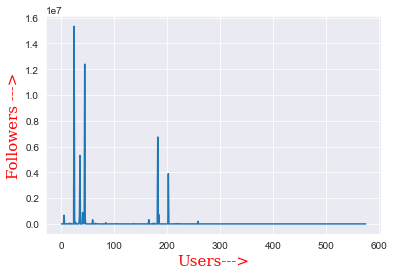

In [60]:
a = []
b = []
for i in range(len(train['profile pic'])):
               a.append(i)

for i in train['#followers']:
               b.append(i)
               
               
b = np.array(b)
plt.plot(b)
plt.xlabel('Users--->', fontdict = font2)
plt.ylabel('Followers --->', fontdict = font2)
plt.show()

In [13]:
def ratio(m, n):
    for i in range(2, min(m, n)):
        if ((m%i == 0) and (n%i == 0)):
            m = m/i
            n = n/i
            
    print("\nThe Ratio is ---->", int(m), ":", int(n))
    print("\nMore Precisely: ", "%.3f"%(m/n))
    
b = train[['#followers', '#follows', 'fake']]
m = 0
n = 0

for i in range(len(b)):
    
    if ((b['#followers'][i] - b['fake'][i]) > m):
        m = b['#followers'][i] - b['fake'][i]
        n = b['#follows'][i]
        
print("Maximum Follower Count:", m)
print("Following Count:", n)
ratio(m, n)


Maximum Follower Count: 15338538
Following Count: 61

The Ratio is ----> 15338538 : 61

More Precisely:  251451.443
